# Motivational Example
Concepts will be covered:
- Regression, classification
- Flattening
- ReLU, Softmax
- Dropout
- Training and Testing

# Import Libraries

In [ ]:
import numpy as np
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Preparing the Training Data
Load MNIST dataset as distributed with keras

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


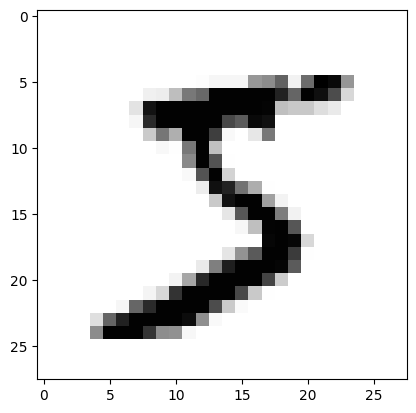

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='Greys');

**Data preparation:**
- the data came in the form of uint8 with value in the [0,255] range. We need to transform it into Python float32 array with values between 0 and 1.

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Defining, Compiling, and Fitting Our Model

**Model 1:**
Our network has 3 layers:
- **First Layer: Input** tf.keras.layers.Flatten - This layer flattens the digit images from a 2-d array of 28 X 28 pixels, to a 1-d array of 784 pixels (28*28).
- **Second Layer: Hidden** tf.keras.layers.Dense - A densely connected layer of 512 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer. Recall that we flattened the image.
- **Output** tf.keras.layers.Dense - A 10-mode softmax layer, with each node representing each of the digit class. As in the previous layer, each node takes input from the 512 nodes in the layer before it. Each node weighs the input according to learned parameters, and then outputs a value in the range [0,1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
h = model.fit(x_train, y_train, epochs=10, batch_size=256)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.3287 - accuracy: 0.9064
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1375 - accuracy: 0.9603
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0927 - accuracy: 0.9737
Epoch 4/10


The "batch_size" tells "model.fit" to update the model variables after every batch of 256 images.

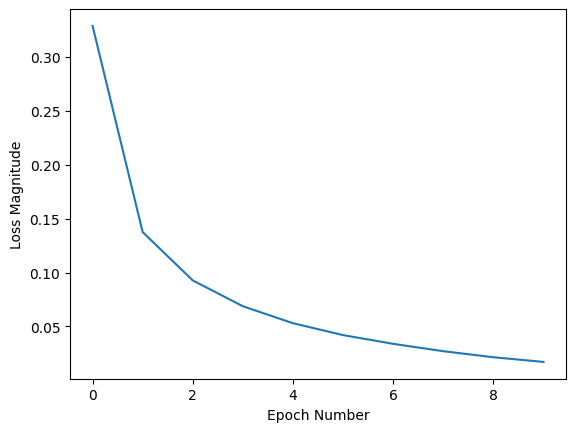

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(h.history['loss'])

In [ ]:
eval_loss, eval_acc = model.evaluate(x_test,
                                     y_test)
print('Test accuracy: {}'.format(eval_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0606 - accuracy: 0.9811
Test accuracy: 0.9811000227928162


# Model 2
- Smaller architecture (128).
- Dropout is 20%, so 20% of the neurons get dropped randomly. Does not allow it to "memorize" the training data. The regularize your model, to be able to generalize better.

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.summary()
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
h = model2.fit(x_train, y_train,
               epochs=10,
               batch_size=256)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 0.4939 - accuracy: 0.8605
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2278

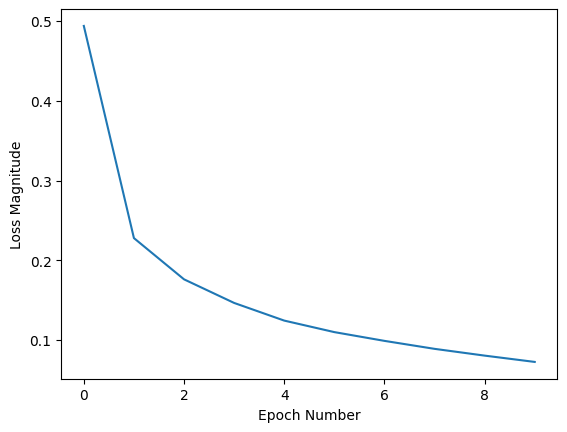

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(h.history['loss'])

In [ ]:
eval_loss, eval_acc = model2.evaluate(x_test, y_test)
print("Test Accuracy: {}".format(eval_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.0763 - accuracy: 0.9767
Test Accuracy: 0.9767000079154968


In [ ]:
img = x_test[0]
print(img.shape)
img = np.array([img])
print(img.shape)

(28, 28)
(1, 28, 28)


In [ ]:
prediction = model2.predict(img)
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print(prediction * 100)

1/1 [==============================] - 0s 30ms/step
[[ 0.00  0.00  0.01  0.09  0.00  0.00  0.00  99.90  0.00  0.00]]


In [ ]:
np.argmax(prediction[0])

7

In [ ]:
y_test[0]

7